In [4]:
import julia
jl = julia.Julia(compiled_modules=False)
from julia import Main
import numpy as  np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [5]:
Main.include("abc_numerics.jl")

<PyCall.jlwrap envStep>

In [6]:
A = -1.28805
B = 0.0314159
C = 0.-0.502655
NU = 0.99
kappa = 0.001
BETA = 0.1
PHI = 0.

In [9]:
a = np.random.random(3)
p = np.random.random(3)
active_traj = [a]
passive_traj = [p]
for i in range(1000):
    state_string = np.array2string(np.append(p,a), separator=",")
    loc_p = np.array2string(p, separator=",")
    p,a,penalty = Main.eval(f"envStep({A},{B},{C}, {PHI}, {NU},{kappa}, {BETA},{state_string},0.05)")
    active_traj.append(a)
    passive_traj.append(p)

In [7]:
active_traj = np.array(active_traj)
passive_traj = np.array(passive_traj)

NameError: name 'active_traj' is not defined

In [12]:
fig = go.Figure(data=go.Scatter3d())


for eps in range(50):

    a = np.array([-0.188495,0.251327,-0.282743])+(np.random.random(3)-0.5)*0.0025 
    p = np.array([-0.188495,0.251327,-0.282743])+(np.random.random(3)-0.5)*0.0025 
    active_traj = [a]
    passive_traj = [p]
    for time_step in range(450):
        state_string = np.array2string(np.append(p,a), separator=",")
        loc_p = np.array2string(p, separator=",")
        p,a,penalty = Main.eval(f"envStep({A},{B},{C}, {PHI}, {NU},{kappa}, {BETA},{state_string},0.05)")
        active_traj.append(a)
        passive_traj.append(p)
    
    
    active_traj = np.array(active_traj)
    passive_traj = np.array(passive_traj)
    fig.add_trace(go.Scatter3d(
    x=active_traj[:,0],
    y=active_traj[:,1],
    z=active_traj[:,2],
    mode='lines',
    #name="Active trajectory"
    ))
    
    fig.add_trace(go.Scatter3d(
    x=passive_traj[:,0],
    y=passive_traj[:,1],
    z=passive_traj[:,2],
    mode='lines',
    #name="Active trajectory"
    ))
    
fig.update_layout(showlegend=False)
fig.show()

In [30]:
0.43*np.sin(3/4*np.pi) + 0.7*np.cos(3/4*np.pi)

-0.1909188309203677

In [23]:
fig.write_html("abc_trajectories_dense.html")

### Now testing the environment wrapping the numerics

In [ ]:
from abc_env import ABC_env

In [ ]:
D = 0.06 # placeholder for now
env = ABC_env(A,B,C,0.5,BETA,kappa,D,NU)
env.deltaT = 0.05
env.limit = 50

In [ ]:
p_traj = []
a_traj = []
while not env.isOver():
    p_traj.append(env.passive)
    a_traj.append(env.active)
    env.step(PHI)
env.reset()
p_traj = np.array(p_traj)
a_traj = np.array(a_traj)
    

In [ ]:

fig = go.Figure(data=go.Scatter3d(
        x=p_traj[:,0],
        y=p_traj[:,1],
        z=p_traj[:,2],
        mode='lines',
        name = "passive trajectory"
      )
    )

fig.add_trace(go.Scatter3d(
    x=a_traj[:,0],
    y=a_traj[:,1],
    z=a_traj[:,2],
    mode='lines',
    name="Active trajectory"
))

### Sampling Lyapunov Exponent (Needed to determine the parameter D)

In [32]:
from scipy.optimize import curve_fit
from scipy.stats import norm

(array([0.01141442, 0.        , 0.00570721, 0.        , 0.        ,
        0.00570721, 0.00570721, 0.02853605, 0.01141442, 0.00570721,
        0.02853605, 0.02853605, 0.00570721, 0.03995048, 0.07419374,
        0.1027298 , 0.11985143, 0.11414422, 0.14268027, 0.19975238,
        0.22828844, 0.34243266, 0.29106776, 0.49082014, 0.59925715,
        0.70769416, 0.90744654, 0.99305471, 1.32407294, 1.40968111,
        1.53523975, 1.86625799, 2.10596085, 2.06030316, 2.46551514,
        2.68809637, 2.53970888, 2.50546561, 2.88214154, 2.68809637,
        2.54541609, 2.27717718, 2.27146996, 1.95757336, 1.72928492,
        1.73499213, 1.54094696, 1.4553388 , 1.19280709, 1.16427104,
        0.97593308, 0.94168981, 0.68486532, 0.63350042, 0.63920763,
        0.43374803, 0.40521198, 0.34813987, 0.29677497, 0.27965334,
        0.27394613, 0.21116681, 0.22828844, 0.18833796, 0.23970286,
        0.17692354, 0.1540947 , 0.1027298 , 0.11985143, 0.11414422,
        0.06848653, 0.05707211, 0.02853605, 0.02

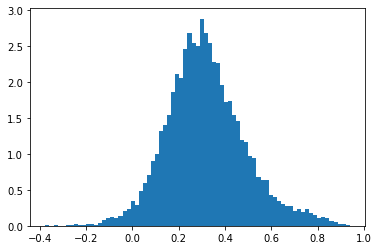

In [33]:
num_eps=10000
start_sep = 0.02*np.pi
sampled_lambdas=[]
t_end = 5.
delta_t = 0.01
PHI=0.
for ep in range(num_eps):
    a = (np.random.random(3)-0.5)*2*np.pi
    sep_vec = np.random.random(3)-0.5
    sep_vec = (sep_vec/np.linalg.norm(sep_vec)) * start_sep
    p = a + sep_vec


    for i in range(int(t_end/delta_t)):
        state_string = np.array2string(np.append(p,a), separator=",")
        p,a,penalty = Main.eval(f"envStep({A},{B},{C}, {PHI}, {NU},{kappa}, {BETA},{state_string},{delta_t})")

        
    final_sep = np.linalg.norm(p-a)
    sampled_lambdas.append((np.log(final_sep/start_sep))/t_end)

    
plt.hist(sampled_lambdas,bins=75,density=True)
    #TODO
    # grab final sep after x time
    # calc lyapunov exponent
    # save in the sampled values and continue

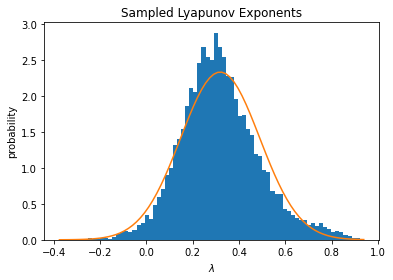

In [35]:
count, bins, _ = plt.hist(sampled_lambdas,bins=75,density=True)
mu, sigma = norm.fit(sampled_lambdas)
plt.plot(bins,norm.pdf(bins,loc=mu,scale=sigma))
plt.xlabel("$\lambda$")
plt.ylabel("probability")
plt.title("Sampled Lyapunov Exponents")
plt.savefig(f"figs/abc_lyapunov_exponents.pdf", format="pdf", bbox_inches="tight")

In [ ]:
mu

In [ ]:
mu, sigma = norm.fit(sampled_lambdas)

For t_end=10

In [ ]:
mu

For t_end=5

In [ ]:
mu